## Project: Detection of Skin cancer from ISIC dataset using CNN
Name: Saunak Mallik | saunak.mallik@outlook.com | MLC64

## Problem statement
- To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.
- The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.
- The data set contains the following diseases:
    - Actinic keratosis
    - Basal cell carcinoma
    - Dermatofibroma
    - Melanoma
    - Nevus
    - Pigmented benign keratosis
    - Seborrheic keratosis
    - Squamous cell carcinoma
    - Vascular lesion

## Objective
- Build a multiclass classification model using a custom convolutional neural network in TensorFlow.

## 🧱🧱 Step1: Load datset and neccessary libraries

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [38]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Add more libraries

# keras libraries for CNN Model building
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling # for re-scaling

# For Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

In [39]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [84]:
pwd

'C:\\Users\\Malliks\\UPGRAD-IIITB\\ML64 - IIITB Main program\\C7.Deep+Learning\\M4.CNN-Melonema Detection assignment'

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [122]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
# data_dir_train = pathlib.Path("data-Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_train = pathlib.Path("data-ISIC\Train")
# data_dir_test = pathlib.Path("data-Skin cancer ISIC The International Skin Imaging Collaboration\Test")
data_dir_train = pathlib.Path("data-ISIC\Test")
data_dir_train

WindowsPath('data-Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [42]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset
- Load the dataset into 3 different datasets -
    - train_ds
    - val_ds
    - test_ds

- All datasets with batch_size=32 and image_size=180 * 180 pixels

In [43]:
# Define some parameters for the loader:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [44]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
## train_ds = ##todo
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [45]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
## val_ds = ##todo
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [46]:
## Write your test dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [47]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## 🧱🧱 Step2: Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [48]:
# train_ds.take?
## Creates a `Dataset` with at most `count` elements from this dataset.

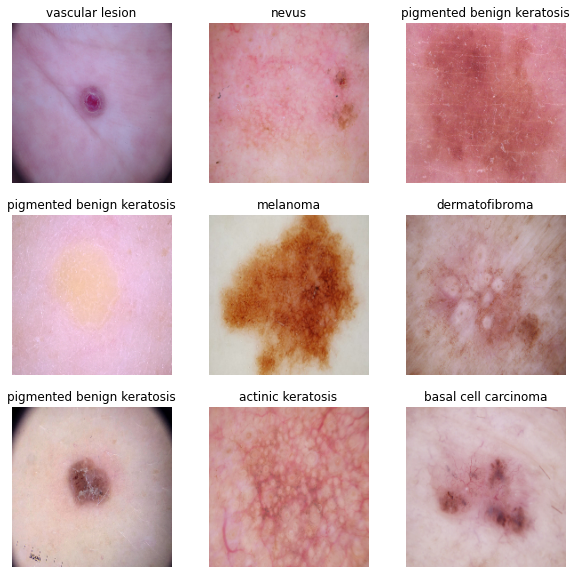

In [49]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [50]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

## 🧱🧱 Step3: [Model 1]: Create the base model
#### Todo: 
- Create a CNN model, which can accurately detect 9 classes present in the dataset. 
- __Re-scale images to Normalize pixel values between (0,1)__. Use `layers.experimental.preprocessing.Rescaling`. The RGB channel values are in the `[0, 255]` range.
- Note: This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

I've created __Model1__ with __Batch size=32__

In [55]:
### Your code goes here
input_shape = (180,180,3)
lr = 1e-5
init = 'normal'
activ = 'relu'
num_classes = len(class_names)

# CNN Model
model = Sequential()

# Re-scaling the pixel values from 0-255 --> 0-1
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

# 1st (Conv + Maxpool) layers: Convolution layer with 64 features, 3x3 filter, RELU activation with 2x2 pooling
model.add ( Conv2D(64, (3,3), padding='same', activation='relu') )
model.add ( MaxPool2D() )

# 2nd (Conv + Maxpool) layers: Convolution layer with 128 features, 3x3 filter, RELU activation with 2x2 pooling
model.add ( Conv2D(128, (3,3), padding='same', activation='relu') )
model.add ( MaxPool2D() )

# Flattening layer - converts the 3D to 1-D vectors to be fed to ANN
model.add ( Flatten() )

# ANN - Activation & multi-class classification 
model.add ( Dense(256, activation='relu') )  # Activation layer
model.add ( Dense(num_classes, activation='softmax') )  # Multi-class classification layer

## Number of classes is 9

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [56]:
### To DO: choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# View the summary of all layers for Model1
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_35 (ModuleW  (None, 180, 180, 64)      1792      
 rapper)                                                         
                                                                 
 module_wrapper_36 (ModuleW  (None, 90, 90, 64)        0         
 rapper)                                                         
                                                                 
 module_wrapper_37 (ModuleW  (None, 90, 90, 128)       73856     
 rapper)                                                         
                                                                 
 module_wrapper_38 (ModuleW  (None, 45, 45, 128)       0         
 rapper)                                              

### Train the Model1 (with Batch size=32)

In [57]:
epochs = 20
batch_size = 32

history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


C:\Users\Malliks\anaconda3\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 85s 1s/step - loss: 3.2062 - accuracy: 0.2427 - val_loss: 1.8213 - val_accuracy: 0.3915
Epoch 2/20
56/56 [==============================] - 83s 1s/step - loss: 1.6760 - accuracy: 0.4135 - val_loss: 1.5120 - val_accuracy: 0.5168
Epoch 3/20
56/56 [==============================] - 86s 2s/step - loss: 1.4304 - accuracy: 0.5061 - val_loss: 1.5048 - val_accuracy: 0.4743
Epoch 4/20
56/56 [==============================] - 85s 2s/step - loss: 1.3114 - accuracy: 0.5435 - val_loss: 1.4294 - val_accuracy: 0.5145
Epoch 5/20
56/56 [==============================] - 83s 1s/step - loss: 1.2570 - accuracy: 0.5619 - val_loss: 1.5856 - val_accuracy: 0.4765
Epoch 6/20
56/56 [==============================] - 82s 1s/step - loss: 1.1260 - accuracy: 0.6049 - val_loss: 1.3962 - val_accuracy: 0.5593
Epoch 7/20
56/56 [==============================] - 81s 1s/step - loss: 0.9230 - accuracy: 0.6691 - val_loss: 1.3952 - val_accuracy: 0.5705
Epoch 8/20
56/56 [=============

### Visualizing training results of Model1 with Batch size=32

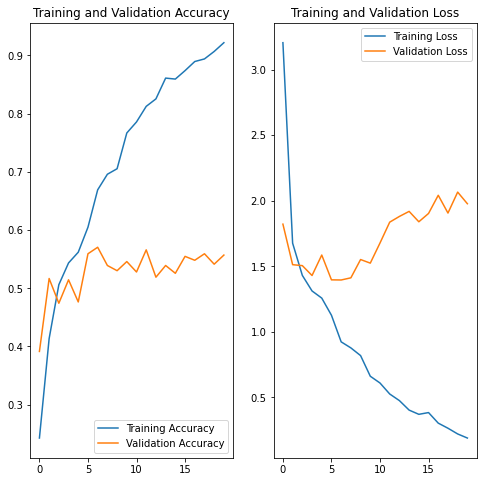

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Check if Model1 is Overfit or Underfit

In [66]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Training Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)


# Thus we can clearly that model Overfit and we need to chose right data augumentation strategy

14/14 [==============================] - 4s 290ms/step - loss: 1.9771 - accuracy: 0.5570
Training Accuracy:  0.9296875
Validation Accuracy:  0.5570470094680786
Loss:  0.18219974637031555
Validation Loss 1.9771296977996826


### Write your findings here
#### 🛑📋 Conclusion 📋🛑

- 1. Training accuracy is 92.9% while the Validation accuracy is 55.7% indicating presence of __`OVERFITTING in Model1`__ i.e., the model may not generalize well to unseen data.
- 2. The graph reflects that -
    - 2.1. During the training process, the model's training accuracy linearly increases over time, whereas the validation accuracy plateaus at 50% accuracy.
    - 2.2. - As the training epochs progress, the training loss decreases, however, the validation loss exhibits an opposing trend and increases.
- 3. Overall, we need to apply techniques like Data Augmentation and Dropout to handle the overfitting issue of the model.


## 🧱🧱 Step4: [Model2] Create the model on the augmented data; also use Dropouts layer

__Enrich the previous model by__ -
1. Augment the dataset (training, validation and testing) with __RandomFlip, RandomRotation and RandomZoom__
2. Use __Dropouts layer__ additionally
2. Create the model, compile and train the model

### [Model2.1] Augmentation strategy used: RandomFlip, RandomRotation and RandomZoom

In [67]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

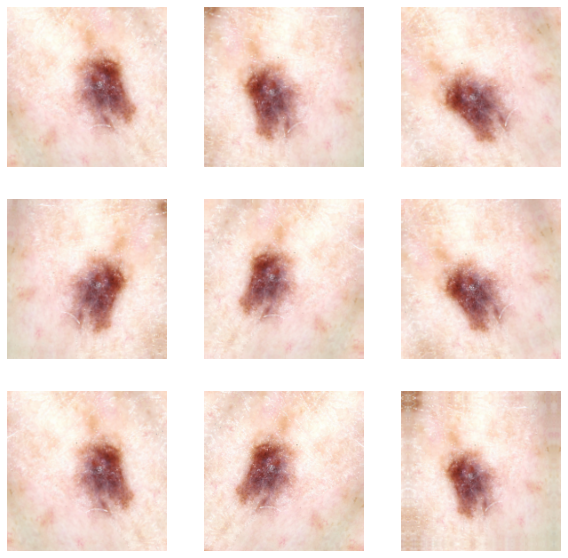

In [68]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Create the Model2.1, compile and train the model


In [69]:
### Your code goes here
input_shape = (180,180,3)
lr = 1e-5
init = 'normal'
activ = 'relu'
num_classes = len(class_names)

# CNN Model
model = Sequential()

# Re-scaling the pixel values from 0-255 --> 0-1
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

#### adding the augmentation layer before the convolution layer
model.add(data_augmentation)

# 1st (Conv + Maxpool) layers: Convolution layer with 64 features, 3x3 filter, RELU activation with 2x2 pooling
model.add ( Conv2D(64, (3,3), padding='same', activation='relu') )
model.add ( MaxPool2D() )

# 2nd (Conv + Maxpool) layers: Convolution layer with 128 features, 3x3 filter, RELU activation with 2x2 pooling
model.add ( Conv2D(128, (3,3), padding='same', activation='relu') )
model.add ( MaxPool2D() )

# Flattening layer - converts the 3D to 1-D vectors to be fed to ANN
model.add ( Flatten() )

# ANN - Activation & multi-class classification 
model.add ( Dense(256, activation='relu') )  # Activation layer
model.add ( Dense(num_classes, activation='softmax') )  # Multi-class classification layer

## Number of classes is 9

### Compiling the Model2.1

In [72]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_7 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_42 (ModuleW  (None, 180, 180, 64)      1792      
 rapper)                                                         
                                                                 
 module_wrapper_43 (ModuleW  (None, 90, 90, 64)        0         
 rapper)                                                         
                                                                 
 module_wrapper_44 (ModuleW  (None, 90, 90, 128)       73856     
 rapper)                                                         
                                                      

### Training the Model2.1

In [73]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 81s 1s/step - loss: 3.2366 - accuracy: 0.2600 - val_loss: 1.8171 - val_accuracy: 0.2975
Epoch 2/20
56/56 [==============================] - 85s 2s/step - loss: 1.6999 - accuracy: 0.3979 - val_loss: 1.5374 - val_accuracy: 0.4944
Epoch 3/20
56/56 [==============================] - 85s 2s/step - loss: 1.5753 - accuracy: 0.4464 - val_loss: 1.6515 - val_accuracy: 0.4631
Epoch 4/20
56/56 [==============================] - 84s 2s/step - loss: 1.5016 - accuracy: 0.4749 - val_loss: 1.6131 - val_accuracy: 0.4474
Epoch 5/20
56/56 [==============================] - 101s 2s/step - loss: 1.4398 - accuracy: 0.4872 - val_loss: 1.4254 - val_accuracy: 0.5056
Epoch 6/20
56/56 [==============================] - 1126s 20s/step - loss: 1.3933 - accuracy: 0.5045 - val_loss: 1.4449 - val_accuracy: 0.5302
Epoch 7/20
56/56 [==============================] - 88s 2s/step - loss: 1.3279 - accuracy: 0.5385 - val_loss: 1.3977 - val_accuracy: 0.5190
Epoch 8/20
56/56

### Visualizing the results

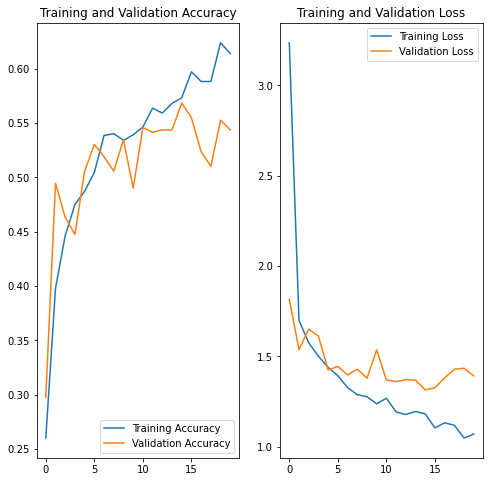

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Check if Model2.1 is Overfit or Underfit

In [75]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Training Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)


# Thus we can clearly that model Overfit and we need to chose right data augumentation strategy

14/14 [==============================] - 4s 309ms/step - loss: 1.3919 - accuracy: 0.5436
Training Accuracy:  0.6584821343421936
Validation Accuracy:  0.5436241626739502
Loss:  0.9548633694648743
Validation Loss 1.391882061958313


### Write your findings here
#### 🛑📋 Conclusion on Model2.1📋🛑

- 1. Training accuracy is 65.8% while the Validation accuracy is 54.3% still indicating presence of __`slight OVERFITTING in Model2.1, although the EXTENT OF OVERFITTING HAS REDUCED after DATA AUGMENTATION`__ i.e., the model may not generalize well to unseen data.
- 2. The graph reflects that -
    - 2.1. During the training process, the model's training accuracy linearly increases over time and gets stalled around 55%-60%, whereas the validation accuracy plateaus at 52% accuracy.
    - 2.2. - As the training epochs progress, the training loss decreases, however, the validation loss also stalls in the 1.4-1.6 range.
- 3. Overall, we need to apply additional techniques like Dropouts on top of Data Augmentation to handle the overfitting issue of the model.


## 🧱🧱 Step5: [Model2.2] Create model on augmented data + additionally use Dropouts layer

__Enrich the previous model by__ -
1. Augment the dataset (training, validation and testing) with __RandomFlip, RandomRotation and RandomZoom__
2. Use __Dropouts layer__ additionally
2. Create the model, compile and train the model

### Create the Model2.2, compile and train the model


In [76]:
### Your code goes here
input_shape = (180,180,3)
lr = 1e-5
init = 'normal'
activ = 'relu'
num_classes = len(class_names)

# CNN Model
model = Sequential()

# Re-scaling the pixel values from 0-255 --> 0-1
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

# Augmentation layer before the convolution layer
model.add(data_augmentation)

# 1st (Conv + Maxpool) layers: Convolution layer with 64 features, 3x3 filter, RELU activation with 2x2 pooling
model.add ( Conv2D(64, (3,3), padding='same', activation='relu') )
model.add ( MaxPool2D() )

# 2nd (Conv + Maxpool) layers: Convolution layer with 128 features, 3x3 filter, RELU activation with 2x2 pooling
model.add ( Conv2D(128, (3,3), padding='same', activation='relu') )
model.add ( MaxPool2D() )

#### Adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

# Flattening layer - converts the 3D to 1-D vectors to be fed to ANN
model.add ( Flatten() )

# ANN - Activation & multi-class classification 
model.add ( Dense(256, activation='relu') )  # Activation layer
model.add ( Dense(num_classes, activation='softmax') )  # Multi-class classification layer

## Number of classes is 9

### Compiling the Model2.2

In [77]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_7 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_49 (ModuleW  (None, 180, 180, 64)      1792      
 rapper)                                                         
                                                                 
 module_wrapper_50 (ModuleW  (None, 90, 90, 64)        0         
 rapper)                                                         
                                                                 
 module_wrapper_51 (ModuleW  (None, 90, 90, 128)       73856     
 rapper)                                                         
                                                      

### Training the Model2.2

In [78]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 86s 2s/step - loss: 2.9773 - accuracy: 0.2188 - val_loss: 1.8925 - val_accuracy: 0.2752
Epoch 2/20
56/56 [==============================] - 88s 2s/step - loss: 1.8889 - accuracy: 0.2991 - val_loss: 1.7178 - val_accuracy: 0.4116
Epoch 3/20
56/56 [==============================] - 100s 2s/step - loss: 1.6923 - accuracy: 0.3945 - val_loss: 1.8047 - val_accuracy: 0.3468
Epoch 4/20
56/56 [==============================] - 507s 9s/step - loss: 1.5651 - accuracy: 0.4492 - val_loss: 1.5671 - val_accuracy: 0.4899
Epoch 5/20
56/56 [==============================] - 87s 2s/step - loss: 1.4303 - accuracy: 0.4827 - val_loss: 1.4093 - val_accuracy: 0.5302
Epoch 6/20
56/56 [==============================] - 88s 2s/step - loss: 1.4019 - accuracy: 0.5084 - val_loss: 1.6092 - val_accuracy: 0.4385
Epoch 7/20
56/56 [==============================] - 594s 11s/step - loss: 1.3458 - accuracy: 0.5251 - val_loss: 1.4193 - val_accuracy: 0.5235
Epoch 8/20
56/56

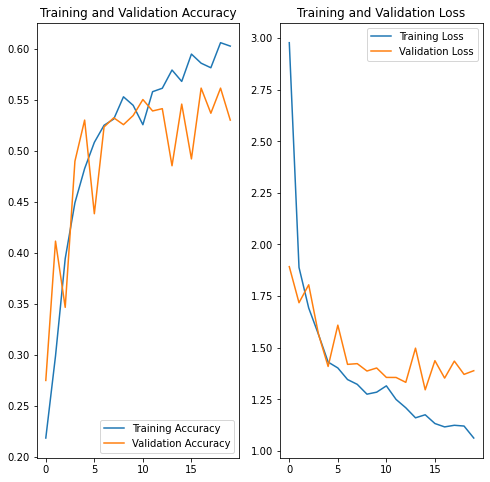

In [88]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Check if Model2.2 is Overfit or Underfit

In [89]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Training Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)


# Thus we can clearly that model Overfit and we need to chose right data augumentation strategy

14/14 [==============================] - 8s 554ms/step - loss: 1.3885 - accuracy: 0.5302
Training Accuracy:  0.6495535969734192
Validation Accuracy:  0.5302013158798218
Loss:  0.9780911207199097
Validation Loss 1.388532280921936


### Write your findings here
-- Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### 🛑📋 Conclusion on Model2.2📋🛑

- 1. Training accuracy is 64.9% while the Validation accuracy is 53% still indicating presence of __`slight OVERFITTING in Model2.2; addition of DROPOUTS hasn't addressed OVERFITTING much`__ i.e., the model may not generalize well to unseen data.
- 2. The graph reflects that -
    - 2.1. During the training process, the model's training accuracy linearly increases over time and gets stalled around 55%-65%, whereas the validation accuracy plateaus at 50%-53% accuracy.
    - 2.2. - As the training epochs progress, the training loss decreases, however, the validation loss stalls around 1.5.


## 🧱🧱 Step6: Check the Class distribution in the original dataset

__Todo: Examining the current class distribution in the training dataset__

#### **Context:** 
- Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. 
- Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [90]:
## Your code goes here.

In [91]:
# len(class_names)
# 9
for i in range(len(class_names)):
    print(class_names[i],' - ',len(list(data_dir_train.glob(class_names[i]+'/*.jpg'))))

actinic keratosis  -  114
basal cell carcinoma  -  376
dermatofibroma  -  95
melanoma  -  438
nevus  -  357
pigmented benign keratosis  -  462
seborrheic keratosis  -  77
squamous cell carcinoma  -  181
vascular lesion  -  139


### Write your findings here

#### 🛑📋 Conclusion on Class findings 📋🛑

#### Which class has the least number of samples?
- seborrheic keratosis with 77 samples

#### Which classes dominate the data in terms proportionate number of samples?
- pigmented benign keratosis with 462 samples

## 🧱🧱 Step7: Handling class imbalances:
Rectifing class imbalances present in the training dataset with Augmentor library.

__Todo:__ Rectifing class imbalances present in the training dataset with __python package Augmentor library__

#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [87]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [100]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

0


In [159]:
pwd

'C:\\Users\\Malliks\\UPGRAD-IIITB\\ML64 - IIITB Main program\\C7.Deep+Learning\\M4.CNN-Melonema Detection assignment'

In [216]:
# data_dir_train = pathlib.Path("data-Skin cancer ISIC The International Skin Imaging Collaboration\Train")
path_to_training_dataset = pathlib.Path ("data-ISIC/Train/")
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset / i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x242001B6760>:   3%| | 17/500 [00:00<00:13, 35.64 Samples/s

Initialised with 114 image(s) found.
Output directory set to data-ISIC\Train\actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x24207F08160>: 100%|█| 500/500 [00:03<00:
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x242001AA820>:   2%| | 12/500 [00:00<00:5

Initialised with 376 image(s) found.
Output directory set to data-ISIC\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24207E8A790>: 100%|█| 500/500 [00:03<00:00, 144.47 Samples
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24200191A60>:   3%| | 15/500 [00:00<00:50,  9.60 Samples/s

Initialised with 95 image(s) found.
Output directory set to data-ISIC\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24200040940>: 100%|█| 500/500 [00:03<00:00, 141.10 Samples
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to data-ISIC\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x24207E71310>: 100%|█| 500/500 [00:20<00:00, 24.87 Samples
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x24203B102B0>:   0%| | 1/500 [00:00<01:03

Initialised with 357 image(s) found.
Output directory set to data-ISIC\Train\nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536 at 0x24207EAD820>: 100%|█| 500/500 [00:22<0
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x24207E96280>:   3%| | 14/500 [00:00<01:1

Initialised with 462 image(s) found.
Output directory set to data-ISIC\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24204E3CEB0>: 100%|█| 500/500 [00:04<00:00, 107.21 Samples
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to data-ISIC\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x242056DC0D0>: 100%|█| 500/500 [00:11<00:00, 45.15 Samples
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to data-ISIC\Train\squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x24207F1C340>: 100%|█| 500/500 [00:04<00:
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x242063BEA90>:   2%| | 8/500 [00:00<00:58

Initialised with 139 image(s) found.
Output directory set to data-ISIC\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x242059C7EB0>: 100%|█| 500/500 [00:05<00:00, 99.93 Samples/


#### 🪧📋 Comment: 
- Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.
- Lets take a look at total count of augmented images.

In [217]:
data_dir_train = path_to_training_dataset = pathlib.Path ("data-ISIC/Train/")
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


### Lets see the distribution of augmented data after adding new images to the original training data.

In [218]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['data-ISIC\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_23579271-a315-4807-9aaf-6ab81f573b8d.jpg',
 'data-ISIC\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_35ac956b-4131-4df5-98d0-bfb7b7f426dc.jpg',
 'data-ISIC\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_e9de37c4-054b-47c1-b8bb-30be0d1af524.jpg',
 'data-ISIC\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_1351957f-6713-4584-ade3-c7e12fb0292a.jpg',
 'data-ISIC\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_4b8ca917-09e6-45f0-9bba-912425c5b05f.jpg',
 'data-ISIC\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_51dec572-80b8-49b5-b73b-3ef1eca97013.jpg',
 'data-ISIC\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_80ad6419-60ab-4373-b414-a5963398e1e9.jpg',
 'data-ISIC\\Train\\actinic keratosis\\output\\actinic keratos

In [219]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [220]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [221]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [222]:
new_df['Label'].value_counts()

melanoma                      500
nevus                         500
actinic keratosis             500
basal cell carcinoma          500
pigmented benign keratosis    500
dermatofibroma                500
seborrheic keratosis          500
vascular lesion               500
squamous cell carcinoma       500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [193]:
'''data_dir_train

WindowsPath('data-ISIC/Train')

## 🧱🧱 Step8: [Model3] FINAL Model Building & Training on rectified class imbalance data 

* Creating a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescaling images to normalize pixel values between (0,1).
* Choosing an appropriate optimiser and loss function for model training
* Training the model for ~30 epochs
* Plotting Graph for findings after the model fit to check if there is any evidence of model overfit or underfit.

#### **Todo**: Train the model on the data created using Augmentor

In [223]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [224]:
data_dir_train

WindowsPath('data-ISIC/Train')

In [225]:
## Saunak: NOT DONE YET. data_dir_train="path to directory with training data + data created using augmentor"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [226]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [227]:
## your code goes here
### Your code goes here
input_shape = (180,180,3)
lr = 1e-5
init = 'normal'
activ = 'relu'
num_classes = len(class_names)

# CNN Model
model = Sequential()

# Re-scaling the pixel values from 0-255 --> 0-1
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

# Augmentation layer before the convolution layer
model.add(data_augmentation)

# 1st (Conv + Maxpool) layers: Convolution layer with 64 features, 3x3 filter, RELU activation with 2x2 pooling
model.add ( Conv2D(64, (3,3), padding='same', activation='relu') )
model.add ( MaxPool2D() )

# 2nd (Conv + Maxpool) layers: Convolution layer with 128 features, 3x3 filter, RELU activation with 2x2 pooling
model.add ( Conv2D(128, (3,3), padding='same', activation='relu') )
model.add ( MaxPool2D() )

#### Adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

# Flattening layer - converts the 3D to 1-D vectors to be fed to ANN
model.add ( Flatten() )

# ANN - Activation & multi-class classification 
model.add ( Dense(256, activation='relu') )  # Activation layer
model.add ( Dense(num_classes, activation='softmax') )  # Multi-class classification layer

## Number of classes is 9

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [228]:
## your code goes here
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_7 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_56 (ModuleW  (None, 180, 180, 64)      1792      
 rapper)                                                         
                                                                 
 module_wrapper_57 (ModuleW  (None, 90, 90, 64)        0         
 rapper)                                                         
                                                                 
 module_wrapper_58 (ModuleW  (None, 90, 90, 128)       73856     
 rapper)                                                         
                                                     

#### **Todo:**  Train your model

In [229]:
# Training the model
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 291s 2s/step - loss: 2.5093 - accuracy: 0.2478 - val_loss: 1.6156 - val_accuracy: 0.4150
Epoch 2/30
169/169 [==============================] - 323s 2s/step - loss: 1.5935 - accuracy: 0.3934 - val_loss: 1.4566 - val_accuracy: 0.4491
Epoch 3/30
169/169 [==============================] - 324s 2s/step - loss: 1.4861 - accuracy: 0.4384 - val_loss: 1.3609 - val_accuracy: 0.4722
Epoch 4/30
169/169 [==============================] - 502s 3s/step - loss: 1.4192 - accuracy: 0.4674 - val_loss: 1.3911 - val_accuracy: 0.4610
Epoch 5/30
169/169 [==============================] - 304s 2s/step - loss: 1.2946 - accuracy: 0.5115 - val_loss: 1.2507 - val_accuracy: 0.5093
Epoch 6/30
169/169 [==============================] - 677s 4s/step - loss: 1.2492 - accuracy: 0.5261 - val_loss: 1.2303 - val_accuracy: 0.5367
Epoch 7/30
169/169 [==============================] - 273s 2s/step - loss: 1.2007 - accuracy: 0.5482 - val_loss: 1.2093 - val_accuracy: 0.5642

#### **Todo:**  Visualize the model results

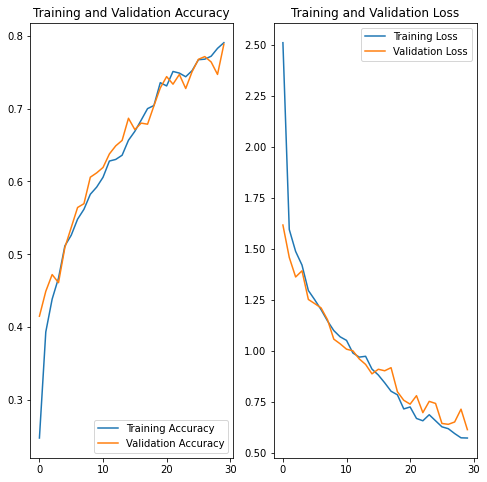

In [230]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### Check if Model3 is Overfit or Underfit

In [231]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Training Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)


# Thus we can clearly that model Overfit and we need to chose right data augumentation strategy

43/43 [==============================] - 14s 318ms/step - loss: 0.6126 - accuracy: 0.7884
Training Accuracy:  0.846068263053894
Validation Accuracy:  0.788418710231781
Loss:  0.40797093510627747
Validation Loss 0.6126185059547424


### Write your findings here
-- Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### 🛑📋 Conclusion on FINAL MODEL (Model3)📋🛑

- 1. With Training accuracy is 84.6% and Validation accuracy of 78.8%, the __`OVERFITTING problem has been RESOLVED in Model3`__ i.e., the Model should perform well on Unknown dataset.
- 2. Thus, we can conclude that __Data Augmentation technique__ and __Class Imbalance handling__ has played a significant Role in addressing the the __overfitting problem__ initially present in the Dataset while also __Improving the Model accuracy__.
- 3. The graph reflects that as the training epochs progresses during the TRaining process -
    - 3.1. the model's __Training and Validation accuracy linearly increases over time__.
    - 3.2. the __Training loss and Validation loss decreases linearly__.
